In [0]:
!pip install tqdm

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from tqdm import tqdm_notebook as tqdm

In [0]:
def get_sampler(name, prob_density, a=0., b=1.):
    """ Construct sampler for given pdf and bounds"""
    
    class mysampler(st.rv_continuous):
        def _pdf(self, x):
            return prob_density(x)
        
    return mysampler(a=a, b=b, name=name)

def estimate_theta(n, sampler, estimate_func):
    """ Estimate theta for single sample"""

    X = sampler.rvs(size=n)
    theta_estimate = estimate_func(X)
    return theta_estimate

def get_std_deviation(k, true_theta, n, sampler, estimate_func):
    """ Calculate std deviation for given k"""

    thetas = np.array([estimate_theta(n, sampler, estimate_func) for _ in range(k)])
    return np.sqrt(np.sum((thetas - true_theta) ** 2) / len(thetas))

def run(theta, n, sampler, max_k, estimate_func):
    """ Draw std_deviation(k) plot"""

    std_deviations = []
    for k in tqdm(range(max_k), total=max_k, leave=True):
        std_deviations.append(get_std_deviation(k + 1, theta, n, sampler, estimate_func))

    fig, ax = plt.subplots()
    ax.plot(range(max_k), std_deviations)
    ax.set(xlabel='k', ylabel=r'$\sqrt{D \theta^{*}}$',
           title=fr'{sampler.name} distribution with $\theta = {theta}$')
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    plt.show()

## ДЗ-2

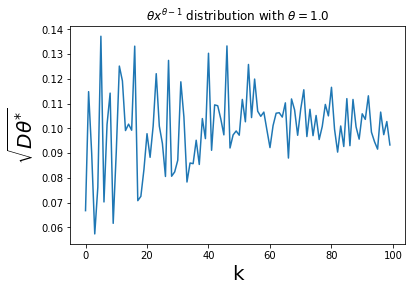

In [27]:
theta = 1.
n = 100
max_k = 100
sampler = get_sampler(
    name=r'$\theta x^{\theta - 1}$',
    prob_density=lambda x: theta * x ** (theta - 1),
    a=0., b=1.,
)
run(theta, n, sampler, max_k, estimate_func=lambda x: - len(x) / np.sum(np.log(x)))

Вывод: большое СКО относительно границ случайной величины $[0, 1]$. С ростом $k$ стремится примерно к $\sim 0.1$.

## ДЗ-3

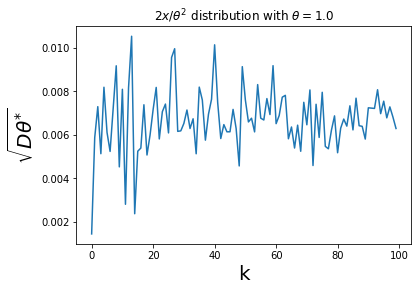

In [28]:
theta = 1.
n = 100
max_k = 100
sampler = get_sampler(
    name=r'$ 2 x / \theta^2$',
    prob_density=lambda x: 2 * x / (theta ** 2),
    a=0., b=theta,
)
run(theta, n, sampler, max_k, estimate_func=np.max)

Вывод: Малельное СКО, с ростом $k$ стремиться примерно $\sim 0.007$.

## ДЗ-4

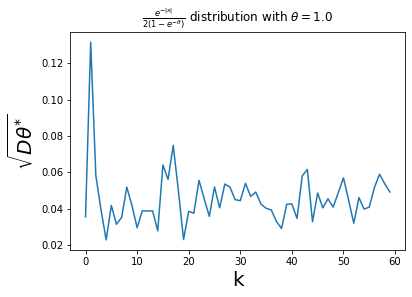

In [30]:
theta = 1.
n = 100
max_k = 60
sampler = get_sampler(
    name=r'$\frac{e^{- |x|}}{2 (1 - e^{- \theta})}$',
    prob_density=lambda x: np.exp(- abs(x)) / (2 * (1 - np.exp(- theta))),
    a=-theta, b=theta,
)
run(theta, n, sampler, max_k, estimate_func=np.max)

Вывод: с ростом $k$ стремиться к $\sim 0.04$.

## ДЗ-5

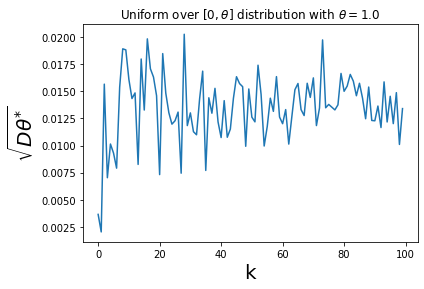

In [31]:
theta = 1.
n = 100
max_k = 100
sampler = get_sampler(
    name=r'Uniform over $[0,\theta]$',
    prob_density=lambda x: 1 / theta,
    a=0, b=theta,
)
run(theta, n, sampler, max_k, estimate_func=np.max)

Вывод: маленькое СКО, с ростом $k$ стремится примерно к $\sim 0.1$ что соответствует теоретически подсчитаному значению дисперсии: $\frac{\theta^2}{n (n + 2)}$